![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)


**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `INTEGRANTES:`

* **BALTAZAR JULCA CRISTHIAN JAIME**
* **GARAY ALCANTARA ALEX**
* **GONZALES BAÑES RICARDO**

```
LABORATORIO 01: Filtros media movil / filtro gaussiano
```

###**1. Importación de Librerías y creación de la señal de prueba**





* **Descarga de archivos de audio e instalación de las bibliotecas necesarias**

In [ ]:
!wget -nc https://storage.googleapis.com/audioset/miaow_16k.wav

!pip install pysoundfile
!pip install bitstring

* **Librerias a utilizar:**

In [ ]:
import soundfile
import numpy as np #Manejo de arrays
import matplotlib.pyplot as plt #Visualización de gráficos.
from IPython.lib.display import Audio
import matplotlib.pyplot as plt
import IPython

* **Importación de audio**

In [ ]:
plt.style.use("dark_background") #Para gráficas para temas oscuros
IPython.display. Audio ("miaow_16k.wav")

* **Lectura del audio**

Tasa de muestreo: 16000 muestras/segundo
Tamaño de señal: 107698 muestras
Duración: 6.731125 segundos


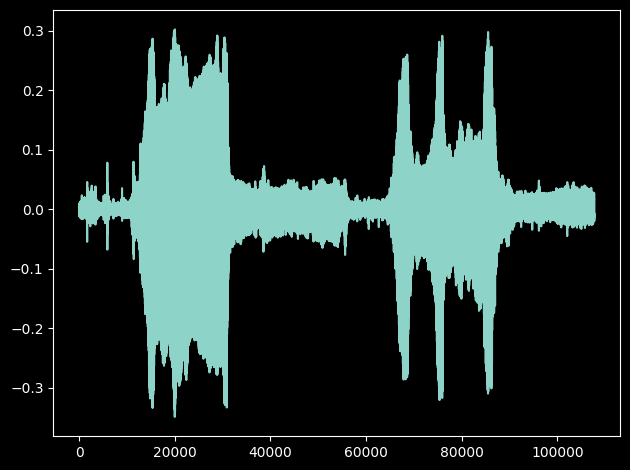

In [ ]:
audio_senial, sampling_rate = soundfile.read("miaow_16k.wav")
type (audio_senial)
print(f'Tasa de muestreo: {sampling_rate} muestras/segundo')
print(f'Tamaño de señal: {audio_senial.shape[0]} muestras')
print(f'Duración: {audio_senial.shape[0]/sampling_rate} segundos')
plt.plot(audio_senial)
plt.tight_layout()
plt.show()

* **Señal Generada**




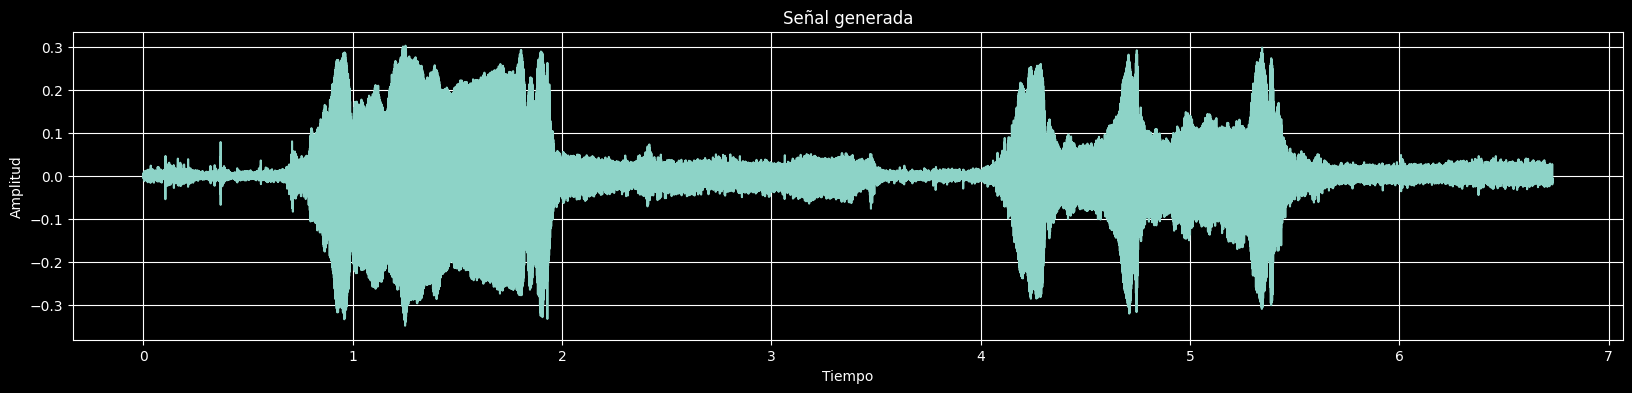

In [ ]:
fm = sampling_rate #Frecuencia de muestreo
t = np.arange(0, len(audio_senial))/fm #Vector tiempo
n = len(t) #Longitud total de señal

amplitud = audio_senial #Señal generada
sen_ruidosa = amplitud #+ ruido
plt.subplots(1,1, figsize=(20,4))

plt.subplot(111)
plt.plot(t,amplitud)
plt.title("Señal generada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()


### **2.1. Filtro media movil**

* **Aplicación del filtro media movil:**

In [ ]:

k = 50 #Orden de filtro es 2k+1=101

sen_filtrada = np.zeros_like(sen_ruidosa)

for i in range(k, n-k-1):

tam_ventana = 1000*(k*2+1)/fm #Se calcula el tamaño de la ventana en milisegundos


* **Gráficas de los resutados:**

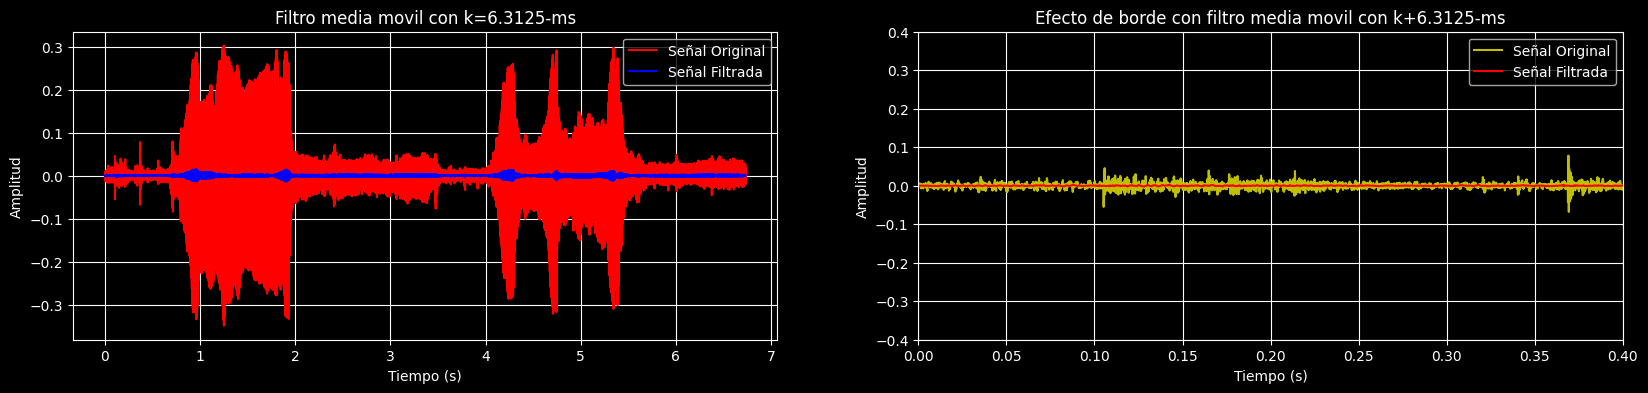

In [ ]:
plt.subplots(1,2,figsize=(20,4))

plt.subplot(121)
plt.plot( t,sen_ruidosa,"r", label="Señal Original")
plt.plot( t,sen_filtrada,"b", label="Señal Filtrada")
plt.title(f"Filtro media movil con k={tam_ventana}-ms")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()


plt.subplot(122)
plt.plot(t,sen_ruidosa,"y",label="Señal Original")
plt.plot(t,sen_filtrada,"r",label="Señal Filtrada")
plt.title(f"Efecto de borde con filtro media movil con k={tam_ventana}-ms")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.axis([0,0.4,-0.4,0.4])
plt.grid()
plt.legend()

plt.show()


### **2.2. Filtro Gaussiano**

* **Creación del filtro gaussiano:**

In [ ]:
FWHM = 6.5 #Establecemos un FWHM teórico de 6.5 ms
k = 50     #Valor para establecer el tamaño de la ventana gaussiana 2k
gt = 1000*np.arange(-k,k+1)/fm #Tiempo normalizado de función gaussiana en ms

filtro_gaussiano = np.exp(-(4*np.log(2)*gt**2)/(FWHM**2)) #Creación de filtro gaussiano
filtro_gaussiano_normalizado = filtro_gaussiano / np.sum(filtro_gaussiano)

#Cálculo empirico del tamaño de FWHM en ms
flanco_bajada = k + np.argmin((filtro_gaussiano[k:]-0.5)**2)
flanco_subida = np.argmin((filtro_gaussiano-0.5)**2)
FWHM_obtenido = -gt[flanco_subida]+gt[flanco_bajada] #Duración del FWHM en ms


* **Mostrando el filtro gaussiano construido:**

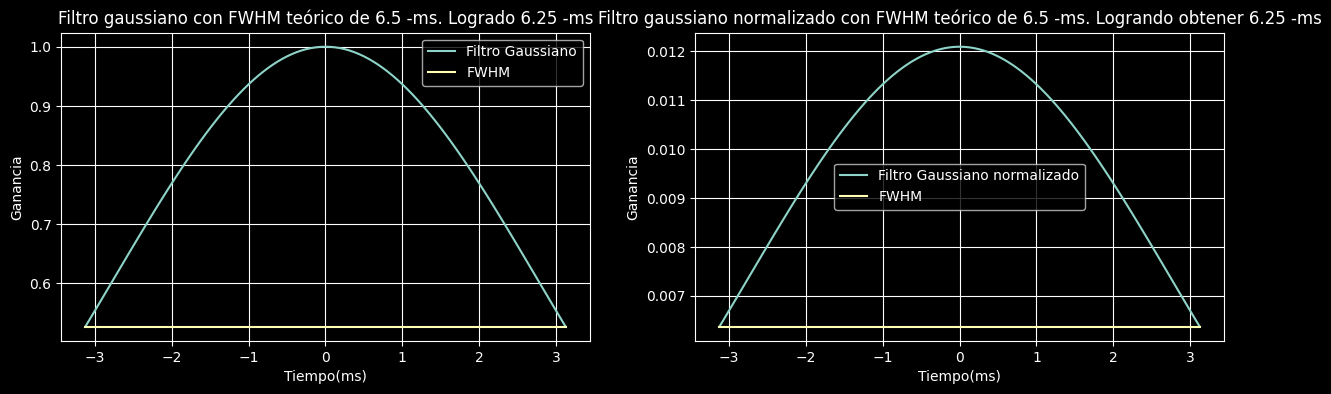

In [ ]:
plt.subplots(1,2, figsize=(15,4))

plt.subplot(121)
plt.plot(gt,filtro_gaussiano, label="Filtro Gaussiano") #Gráfica construida
plt.plot([gt[flanco_subida],gt[flanco_bajada]],
         [filtro_gaussiano[flanco_subida],filtro_gaussiano[flanco_bajada]],
         label="FWHM") #Gráfica linea FWHM

plt.title(f"Filtro gaussiano con FWHM teórico de {FWHM} -ms. Logrado {FWHM_obtenido} -ms")
plt.xlabel('Tiempo(ms)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(gt,filtro_gaussiano_normalizado,label="Filtro Gaussiano normalizado") #Gráfica construida
plt.plot([gt[flanco_subida],gt[flanco_bajada]],
         [filtro_gaussiano_normalizado[flanco_subida],filtro_gaussiano_normalizado[flanco_bajada]],
         label="FWHM") #Gráfica linea FWHM
plt.title(f"Filtro gaussiano normalizado con FWHM teórico de {FWHM} -ms. Logrando obtener {FWHM_obtenido} -ms")
plt.xlabel('Tiempo(ms)')
plt.ylabel('Ganancia')
plt.grid()
plt.legend()

plt.show()

* **Aplicación del filtro Gaussiano:**

In [ ]:
senial_filtrada_gaussiana = np.zeros_like(sen_ruidosa)

for i in range(k,n-k-1):
  senial_filtrada_gaussiana[i] = np.sum(sen_ruidosa[i-k:i+k+1]*filtro_gaussiano_normalizado)  #Ponderación de salidas

* **Mostrando los resultados:**

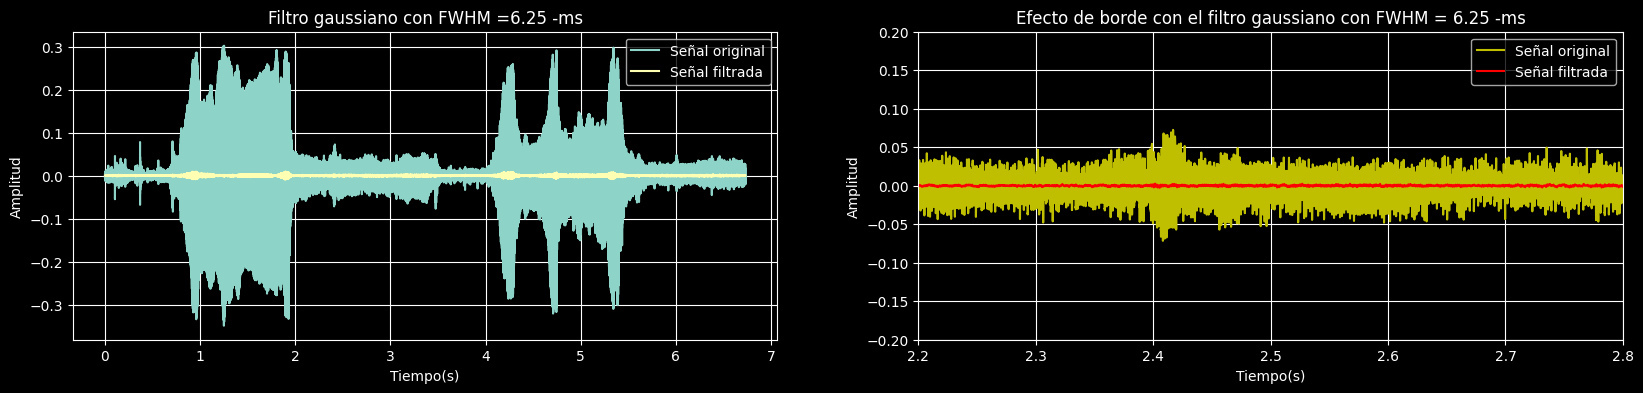

In [ ]:
plt.subplots(1,2, figsize=(20,4))

plt.subplot(121)
plt.plot(t, sen_ruidosa, label="Señal original")
plt.plot(t,senial_filtrada_gaussiana, label="Señal filtrada")
plt.title(f"Filtro gaussiano con FWHM ={FWHM_obtenido} -ms")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(t, amplitud, "y", label = "Señal original")j
plt.plot(t,senial_filtrada_gaussiana,"r", label="Señal filtrada")
plt.title(f"Efecto de borde con el filtro gaussiano con FWHM = {FWHM_obtenido} -ms")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([2.2, 2.8, -0.2, 0.2])
plt.grid()
plt.legend()

plt.show()

* **AUDIOS FILTRADOS**

#### MEDIA MOVIL

In [ ]:
Audio(sen_filtrada, rate = fm)

#### GAUSSIANO

In [ ]:
Audio(senial_filtrada_gaussiana, rate = fm)

* **COMPARACION**

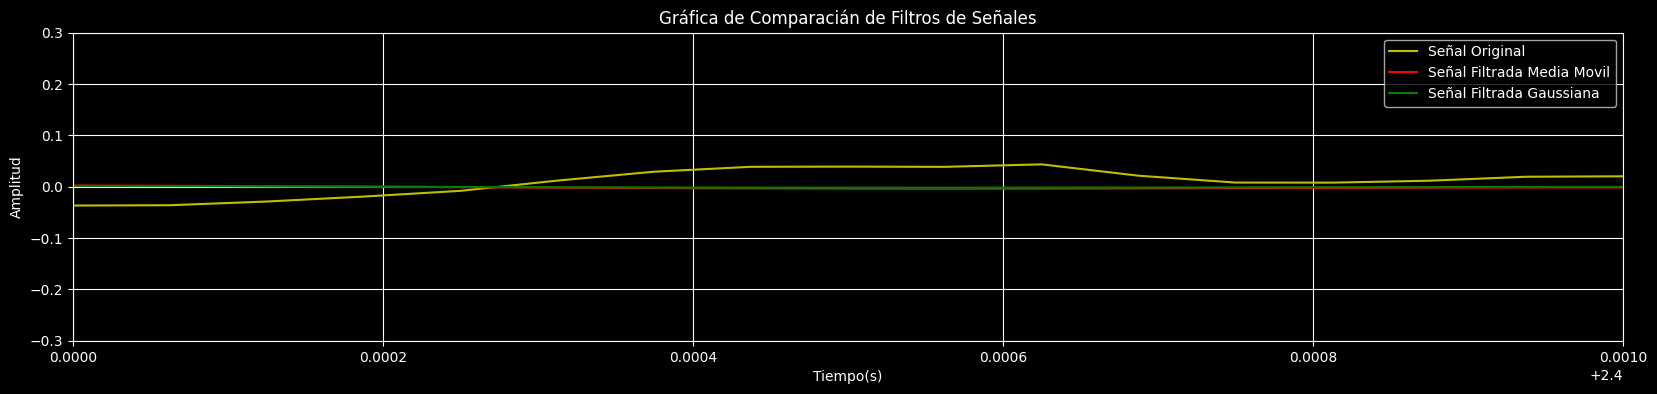

In [ ]:
plt.subplots(figsize=(20,4))

plt.plot(t, sen_ruidosa,"y", label="Señal Original")
plt.plot(t,sen_filtrada,"r",label="Señal Filtrada Media Movil")
plt.plot(t,senial_filtrada_gaussiana,"g", label="Señal Filtrada Gaussiana")
plt.title("Gráfica de Comparacián de Filtros de Señales")
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([2.4, 2.401, -0.3, 0.3])
plt.grid()
plt.legend()
plt.show()

¿Que efecto sonoro identifica entre el audio original y el modificado?

* **RPT**

### **3. Test de comprobación**

#### **3.1. ¿Cuál es la diferencia entre una señal estocástica de una señal determinística? Explique.**

la diferencia entre una señal estocastica y una deterministica es la aletoriedad, mientras que en laseñal estocastica no hay un patron, en otras palabras, la señales totalmente aleatoria. mientras que en la deterministica, como su mismo nombre lo dice, sigue un patron establoecido por alguna regla

#### **3.2. ¿Qué es la tasa de muestreo de la señal? Explique.**

La tasa de muestreo de una señal, en términos sencillos, se refiere a cuántas veces por segundo tomamos mediciones de esa señal para convertirla en una forma digital. Es como la cantidad de "fotogramas por segundo" (FPS) en un video, donde una tasa de muestreo alta significa más detalles, al igual que más FPS en un video ofrecen una imagen más fluida y detallada. Una tasa de muestreo baja, en cambio, captura menos detalles y es similar a tener menos FPS en un video, lo que puede resultar en una representación digital menos precisa de la señal original. Elegir la tasa de muestreo adecuada es esencial para preservar la información importante de la señal.




#### **3.3. ¿El filtro media móvil implementado es causal? Explique.**

el filtro de media movil realizado es causal, ya que toma valores pasados y presentes


### **4. REFERENCIAS BIBLIOGRAFICAS**